Step 1 - Import python libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns
import scipy
import pandas.util.testing as tm
from scipy import stats

Step 2 - Load and read the data file
1.   Upload data file from Google drive and run the notebook in the cloud
2.   Upload data file from local computer and run the notebook in the cloud
3.   Load data file from local computer and run the notebook locally

Step 2 - Option 1 - Upload data file from Google drive

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#change the file name ("complete_COVID_samples.tsv") to your file name to load the data
df=pd.read_table('/content/drive/MyDrive/complete_COVID_samples.tsv')
df

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (13,14,16,20) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


,sample,frequency,templates,amino_acid,rearrangement,v_resolved,d_resolved,j_resolved,age,gender,smoker,icu_admit,birth_year,blood_type,cmv_at_donation,days_from_last_symptom_to_sample,ethnicity,height_meters,hospitalized,weight_kg,race
0,6232BW_TCRB,0.006751,3636,CASSLGLAGPGFF,ACGATCCAGCGCACAGAGCAGGAGGACTCGGCCGTGTATCTCTGTG...,TCRBV07-02,TCRBD02-01*02,TCRBJ02-01*01,72,Male,False,False,1948,ab neg,NEG,26.0,not hispanic/latino,1.778,True,95.24,Caucasian
1,6232BW_TCRB,0.005639,3037,CASRVGSSYNEQFF,ATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTGCCA...,TCRBV12,TCRBD02-01*02,TCRBJ02-01*01,72,Male,False,False,1948,ab neg,NEG,26.0,not hispanic/latino,1.778,True,95.24,Caucasian
2,6232BW_TCRB,0.004258,2293,CASNPYRVNTGELFF,GAGTCGCCCAGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCA...,TCRBV27-01*01,TCRBD02-01*02,TCRBJ02-02*01,72,Male,False,False,1948,ab neg,NEG,26.0,not hispanic/latino,1.778,True,95.24,Caucasian
3,6232BW_TCRB,0.003639,1960,CASSALRSSYNEQFF,CAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTGCCAGCT...,TCRBV12,unknown,TCRBJ02-01*01,72,Male,False,False,1948,ab neg,NEG,26.0,not hispanic/latino,1.778,True,95.24,Caucasian
4,6232BW_TCRB,0.003521,1896,CASSFEDEGGETQYF,AACGCCTTGTTGCTGGGGGACTCGGCCCTCTATCTCTGTGCCAGCA...,TCRBV05-06*01,unknown,TCRBJ02-05*01,72,Male,False,False,1948,ab neg,NEG,26.0,not hispanic/latino,1.778,True,95.24,Caucasian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15061643,1566265BW_TCRB,0.000001,1,CSVEDLRGGYTF,CTGACTGTGAGCAACATGAGCCCTGAAGACAGCAGCATATATCTCT...,TCRBV29-01,unknown,TCRBJ01-02*01,33,Female,False,False,1987,NaN,NaN,51.0,not hispanic/latino,1.676,False,72.56,Caucasian
15061644,1566265BW_TCRB,0.000001,1,CASGRRGDYGYTF,AAGATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTG...,TCRBV12-03/12-04*01,unknown,TCRBJ01-02*01,33,Female,False,False,1987,NaN,NaN,51.0,not hispanic/latino,1.676,False,72.56,Caucasian
15061645,1566265BW_TCRB,0.000001,1,CASSWTGNSPLHF,AAGATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTG...,TCRBV12-03/12-04*01,TCRBD02-01,TCRBJ01-06*02,33,Female,False,False,1987,NaN,NaN,51.0,not hispanic/latino,1.676,False,72.56,Caucasian
15061646,1566265BW_TCRB,0.000001,1,CASSLDWTEYYEQYF,CAGCCTGCAAAGCTTGAGGACTCGGCCGTGTATCTCTGTGCCAGCA...,TCRBV11-02*01,TCRBD01-01*01,TCRBJ02-07*01,33,Female,False,False,1987,NaN,NaN,51.0,not hispanic/latino,1.676,False,72.56,Caucasian


Step 2 - Option 2 - Upload data file from local computer

In [ ]:
from google.colab import files 
uploaded = files.upload()

In [ ]:
import io

#change the file name ("complete_COVID_samples.tsv") to your file name to load the data
df = pd.read_table(io.BytesIO(uploaded['complete_COVID_samples.tsv']), sep = '\t')
df

Step 2 - Option 3 - Run the notebook locally (refer here for how to connect to local runtime https://research.google.com/colaboratory/local-runtimes.html)

In [ ]:
#change the file name ("complete_COVID_samples.tsv") to your file name to load the data
df = pd.read_table('downloads/covid_data/complete_COVID_samples.tsv', sep = '\t')
df

Step 3 - Create the standardized format (column content and column names)
1.   Sample name (sample)
2.   Clone frequency (freq)
3.   Clone reads count (#count)
4.   CDR3 amino acid clonotype (cdr3aa)
5.   CDR3 nucleotide (cdr3nt)
6.   V gene (v)
7.   D gene (d)
8.   J gene (j)
9.   Optional - Sample feature (here we use hospitalization as the clinical feature)

In [ ]:
#select the columns that are listed above
df = df[['sample','frequency', 'templates', 'amino_acid', 'rearrangement', 'v_resolved', 'd_resolved','j_resolved','hospitalized']]
#rename the columns 
df.columns = ['sample', 'freq' , '#count' , 'cdr3aa' , 'cdr3nt' , 'v' , 'd' , 'j' , 'hospitalization']

df = df.copy()

#if there are more than one v,d,j, leave only the first one 
df['v']=df['v'].str.replace("(/).*","")
df['d']=df['d'].str.replace("(/).*","")
df['j']=df['j'].str.replace("(/).*","")

Usage analysis 1 - Top n highest clonotypes 

1.   change the number in the tail () to the number that you are interested in 



In [ ]:
df1=df.sort_values(['sample', 'freq'], axis=0).groupby('sample').tail(10)
df1 = df1[['freq', 'cdr3aa', 'sample', 'hospitalization']]
df1

,freq,cdr3aa,sample,hospitalization
13483024,0.000881,CASSQAPTGPYEQYF,1132289BW_TCRB,False
13483023,0.001140,CASSPRDRGDEQYF,1132289BW_TCRB,False
13483022,0.001276,CASSLTMLAGAGGELFF,1132289BW_TCRB,False
13483021,0.001331,CASSSGVGNQPQHF,1132289BW_TCRB,False
13483020,0.001341,CASTGTDNGLYNSPLHF,1132289BW_TCRB,False
...,...,...,...,...
437916,0.001801,CASSLVAGGFEQYF,989003BW_TCRB,True
437915,0.002060,CSASDLGGRLDTQYF,989003BW_TCRB,True
437914,0.002458,CASSQGYEQYF,989003BW_TCRB,True
437913,0.006403,CASSLTSGSLNEQFF,989003BW_TCRB,True


Usage analysis 2 - Bottom n lowest clonotypes 

1.   change the number in the head () to the number that you are interested in 



In [ ]:
df2=df.sort_values(['sample', 'freq'], axis=0).groupby('sample').head(10)
df2=df2[['freq', 'cdr3aa', 'sample', 'hospitalization']]
df2

,freq,cdr3aa,sample,hospitalization
13533460,0.000001,CASSSQQGSYGYTF,1132289BW_TCRB,False
13533461,0.000001,CASSYSAGSYGYTF,1132289BW_TCRB,False
13533462,0.000001,CASRRTLPGNYEQYF,1132289BW_TCRB,False
13533463,0.000001,CASRGQAISYGYTF,1132289BW_TCRB,False
13533464,0.000001,CASSITGTGNYEQYF,1132289BW_TCRB,False
...,...,...,...,...
486295,0.000002,CASSGGTAVEGYTF,989003BW_TCRB,True
486296,0.000002,CASSLETGVGTGYTF,989003BW_TCRB,True
486297,0.000002,CSAREGLAEQYF,989003BW_TCRB,True
486298,0.000002,CASSLNPQGRAEGYTF,989003BW_TCRB,True


Usage analysis 3 - Top n highest V gene (D gene, J gene)
1.   change the number in the tail () to the number that you are interested in 
2.   change 'v' to other genes that you are interested in

In [ ]:
df3 = df[['freq', 'v', 'sample','hospitalization']]
df3=df3.sort_values(['sample','freq'], axis=0).groupby('sample').tail(10)
df3

,freq,v,sample,hospitalization
13483024,0.000881,TCRBV04-01*01,1132289BW_TCRB,False
13483023,0.001140,TCRBV06-02*02,1132289BW_TCRB,False
13483022,0.001276,TCRBV07-03*01,1132289BW_TCRB,False
13483021,0.001331,TCRBV07-03*01,1132289BW_TCRB,False
13483020,0.001341,TCRBV07-09,1132289BW_TCRB,False
...,...,...,...,...
437916,0.001801,TCRBV19-01*01,989003BW_TCRB,True
437915,0.002060,TCRBV20-01*04,989003BW_TCRB,True
437914,0.002458,TCRBV03-01,989003BW_TCRB,True
437913,0.006403,TCRBV19-01*01,989003BW_TCRB,True


Usage analysis 4 - Bottom n lowest V gene (D gene, J gene)

1.   change the number in the head () to the number that you are interested in 
2.   change 'v' to other genes that you are interested in


In [ ]:
df4 = df[['freq', 'v', 'sample','hospitalization']]
df4 = df4.sort_values(['sample','freq'], axis=0).groupby('sample').head(10)
df4

,freq,v,sample,hospitalization
13533460,0.000001,TCRBV19-01*01,1132289BW_TCRB,False
13533461,0.000001,TCRBV06-05*01,1132289BW_TCRB,False
13533462,0.000001,TCRBV07-02,1132289BW_TCRB,False
13533463,0.000001,TCRBV05-01*01,1132289BW_TCRB,False
13533464,0.000001,TCRBV06-05*01,1132289BW_TCRB,False
...,...,...,...,...
486295,0.000002,TCRBV02-01,989003BW_TCRB,True
486296,0.000002,TCRBV05-06*01,989003BW_TCRB,True
486297,0.000002,TCRBV20,989003BW_TCRB,True
486298,0.000002,TCRBV11-02,989003BW_TCRB,True


Usage analysis 5.1 - V gene weighted usage (D gene, J gene)
1.   change 'v' to other genes that you are interested in

In [ ]:
df_frequency=df.groupby(['sample','v','hospitalization'], as_index=False)['freq'].agg({'frequency':'sum'})
df_frequency

,sample,v,hospitalization,frequency
0,1132289BW_TCRB,TCRBV01-01*01,False,0.000885
1,1132289BW_TCRB,TCRBV02-01,False,0.031511
2,1132289BW_TCRB,TCRBV03-01,False,0.029386
3,1132289BW_TCRB,TCRBV04,False,0.000045
4,1132289BW_TCRB,TCRBV04-01*01,False,0.020029
...,...,...,...,...
4628,989003BW_TCRB,TCRBV30-01,True,0.002628
4629,989003BW_TCRB,TCRBV30-01*01,True,0.017288
4630,989003BW_TCRB,TCRBV30-01*05,True,0.001720
4631,989003BW_TCRB,TCRBVA-01*01,True,0.000021


Usage analysis 5.1.1 - Test if the dataset is normally distributed
1.  the null hypothesis here is normality
2.  if the p value is greater than 0.05, we cannot reject the null hypothesis (it is a normal distribution). If the p value is smaller than 0.05, we reject the null hypothesis (it is not a normal distribution)

In [ ]:
x = stats.normaltest(df_frequency['frequency'])
x

NormaltestResult(statistic=2950.3412662574083, pvalue=0.0)

Usage analysis 5.1.2 - Stat test
1.  if the dataset is normally distributed, use t-test (stats.ttest_ind)
*   change the group1, group2 to the groups/samples that you are interested in
*   change 'v' to other genes that you are interested in
2.  if the dataset is not normally distributed, use Wilcoxon rank-sum test (stats.ranksums)
*   change the group1, group2 to the groups/samples that you are interested in
*   change 'v' to other genes that you are interested in

In [ ]:
def usage_stat(df):
    out = {}
    uniq_vsegs = df['v'].unique()
    for V in uniq_vsegs:
        tmp = df[df['v'] == V]
        df_group1 = tmp[tmp['hospitalization'] == True]['frequency']
        df_group2 = tmp[tmp['hospitalization'] == False]['frequency']
        stat = stats.ranksums(df_group1, df_group2)
        out[V] = stat
    return out

In [ ]:
#stat calculation
usage_stat(df_frequency)

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:6475: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:6475: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:6475: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:6475: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:6475: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:6475: RuntimeWarning: invalid value encounter

{'TCRBV01-01*01': RanksumsResult(statistic=-0.1494035761667992, pvalue=0.8812351900302706),
 'TCRBV02-01': RanksumsResult(statistic=-1.2549900398011133, pvalue=0.20948237571633044),
 'TCRBV03-01': RanksumsResult(statistic=-0.08964214570007951, pvalue=0.9285715917804441),
 'TCRBV04': RanksumsResult(statistic=-1.7330814835348707, pvalue=0.08308118696647387),
 'TCRBV04-01*01': RanksumsResult(statistic=-1.88248505970167, pvalue=0.05977018652455784),
 'TCRBV04-02': RanksumsResult(statistic=1.2251093245677536, pvalue=0.2205340323666295),
 'TCRBV04-02*01': RanksumsResult(statistic=0.11952286093343936, pvalue=0.9048611294504482),
 'TCRBV04-02*02': RanksumsResult(statistic=-0.4183300132670378, pvalue=0.6757058487030954),
 'TCRBV04-03*01': RanksumsResult(statistic=-0.8549819600709617, pvalue=0.39256113482092736),
 'TCRBV05': RanksumsResult(statistic=0.0, pvalue=1.0),
 'TCRBV05-01*01': RanksumsResult(statistic=0.0, pvalue=1.0),
 'TCRBV05-02*01': RanksumsResult(statistic=0.5, pvalue=0.617075077451

Usage analysis 5.1.3 - Show the V gene weighted usage that are statically significant
1.   change the specific v gene to the ones that are statically significant in your analysis
2.   change 'v' to other genes that you are interested in

In [ ]:
df_frequency_significant = df_frequency.loc[(df_frequency['v'] == 'TCRBV05-05*01') | (df_frequency['v'] == 'TCRBV13-01*01') | (df_frequency['v'] == 'TCRBV20')] 
df_frequency_significant = df_frequency_significant.groupby(['hospitalization','v']).agg({'frequency':'mean'}).reset_index().rename(columns={'frequency':"mean_frequency"})
df_frequency_significant 

,hospitalization,v,mean_frequency
0,False,TCRBV05-05*01,0.008403
1,False,TCRBV13-01*01,0.006918
2,False,TCRBV20,0.058781
3,True,TCRBV05-05*01,0.006590
4,True,TCRBV13-01*01,0.004187
5,True,TCRBV20,0.063755


Usage analysis 5.2 - V gene weighted usage heatmap (D gene, J gene)
1.   change 'v' to other genes that you are interested in

Text(0.5, 1.0, 'V gene weighted usage')

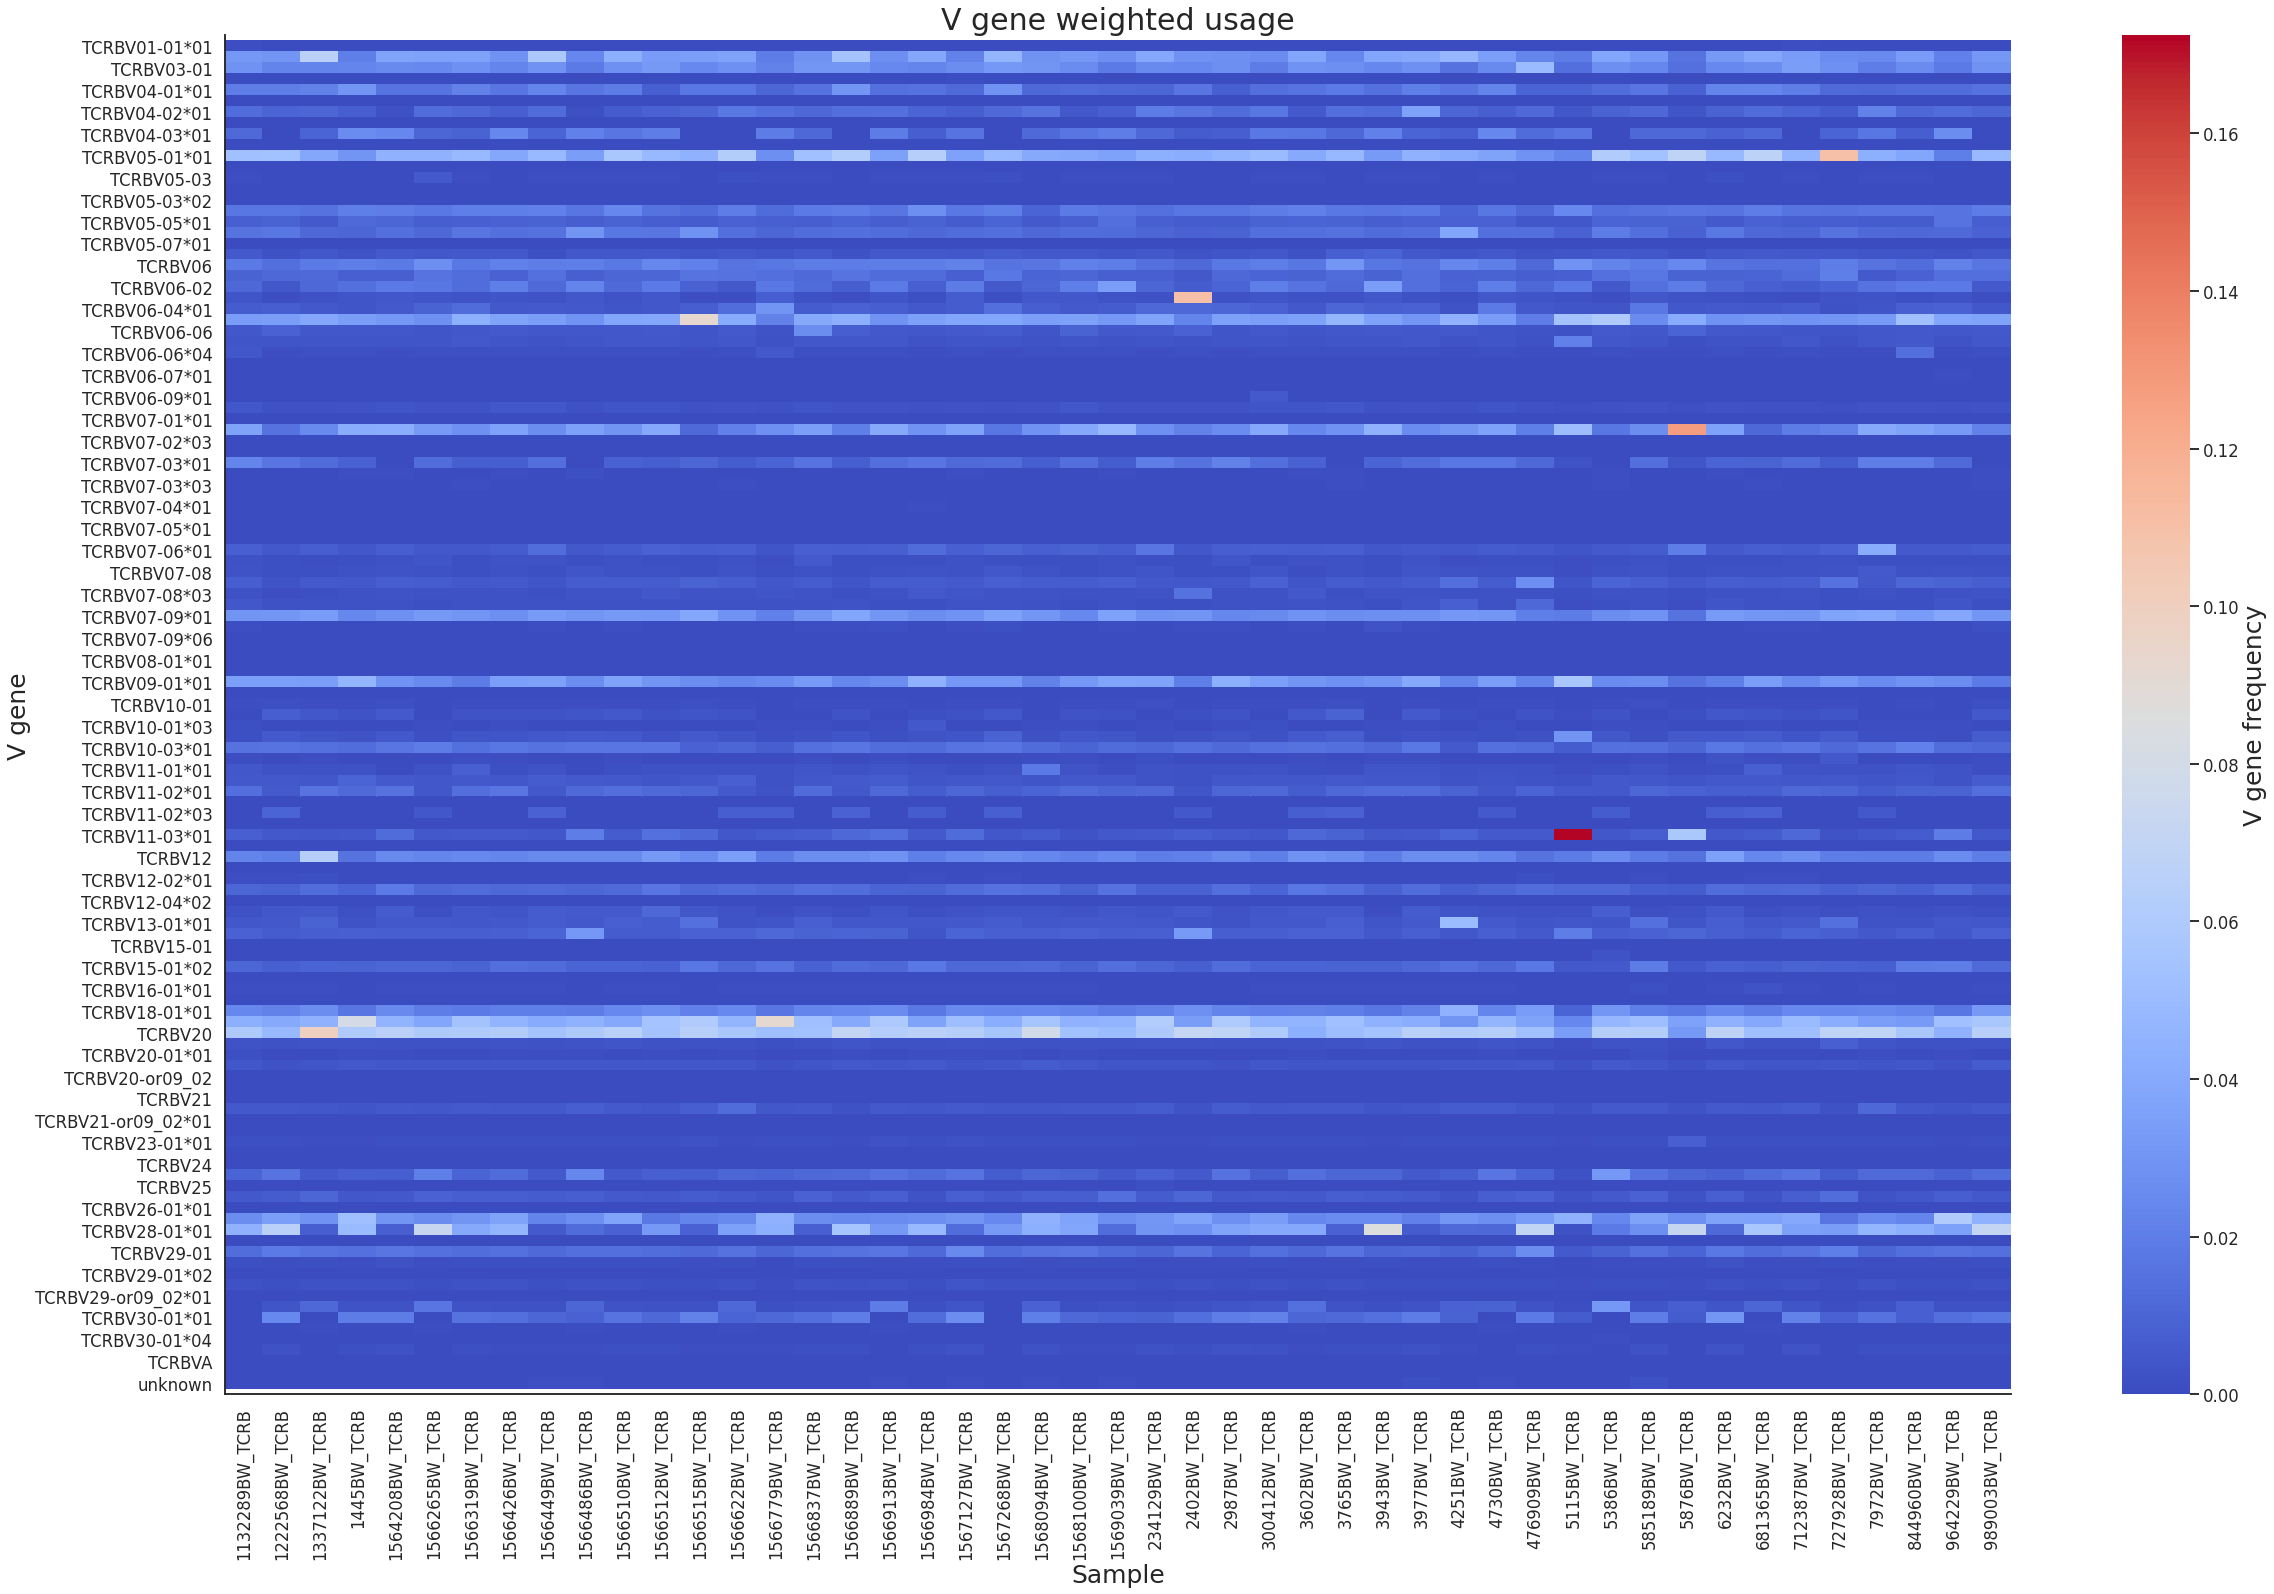

In [ ]:
#set aesthetics
plt.style.use(['ggplot', 'seaborn-white'])
plt.figure(figsize=(40,25))
sns.set_style("white")
sns.set_context("talk")

#prepare the data
df_frequency['frequency'] = df_frequency['frequency'].astype(float)
result = df_frequency.pivot(index='v',columns='sample',values='frequency')

#fill the missing value in frequency with 0
result = result.fillna(0)

#plot the heatmap
ax = sns.heatmap(result, cmap='coolwarm', cbar_kws={'label': 'V gene frequency'})
ax.set_xlabel('Sample',fontsize=25)
ax.set_ylabel('V gene',fontsize=25)
cbar_axes = ax.figure.axes[-1]

#change the colorbar label fontsize
ax.figure.axes[-1].yaxis.label.set_size(25)
sns.despine()
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.title('V gene weighted usage', fontsize=30)

Usage analysis 5.3 - V gene weighted usage hierarchically-clustered heatmap (D gene, J gene)
1.  change 'v' to other genes that you are interested in

Text(0.5, 0.98, 'V gene weighted usage')

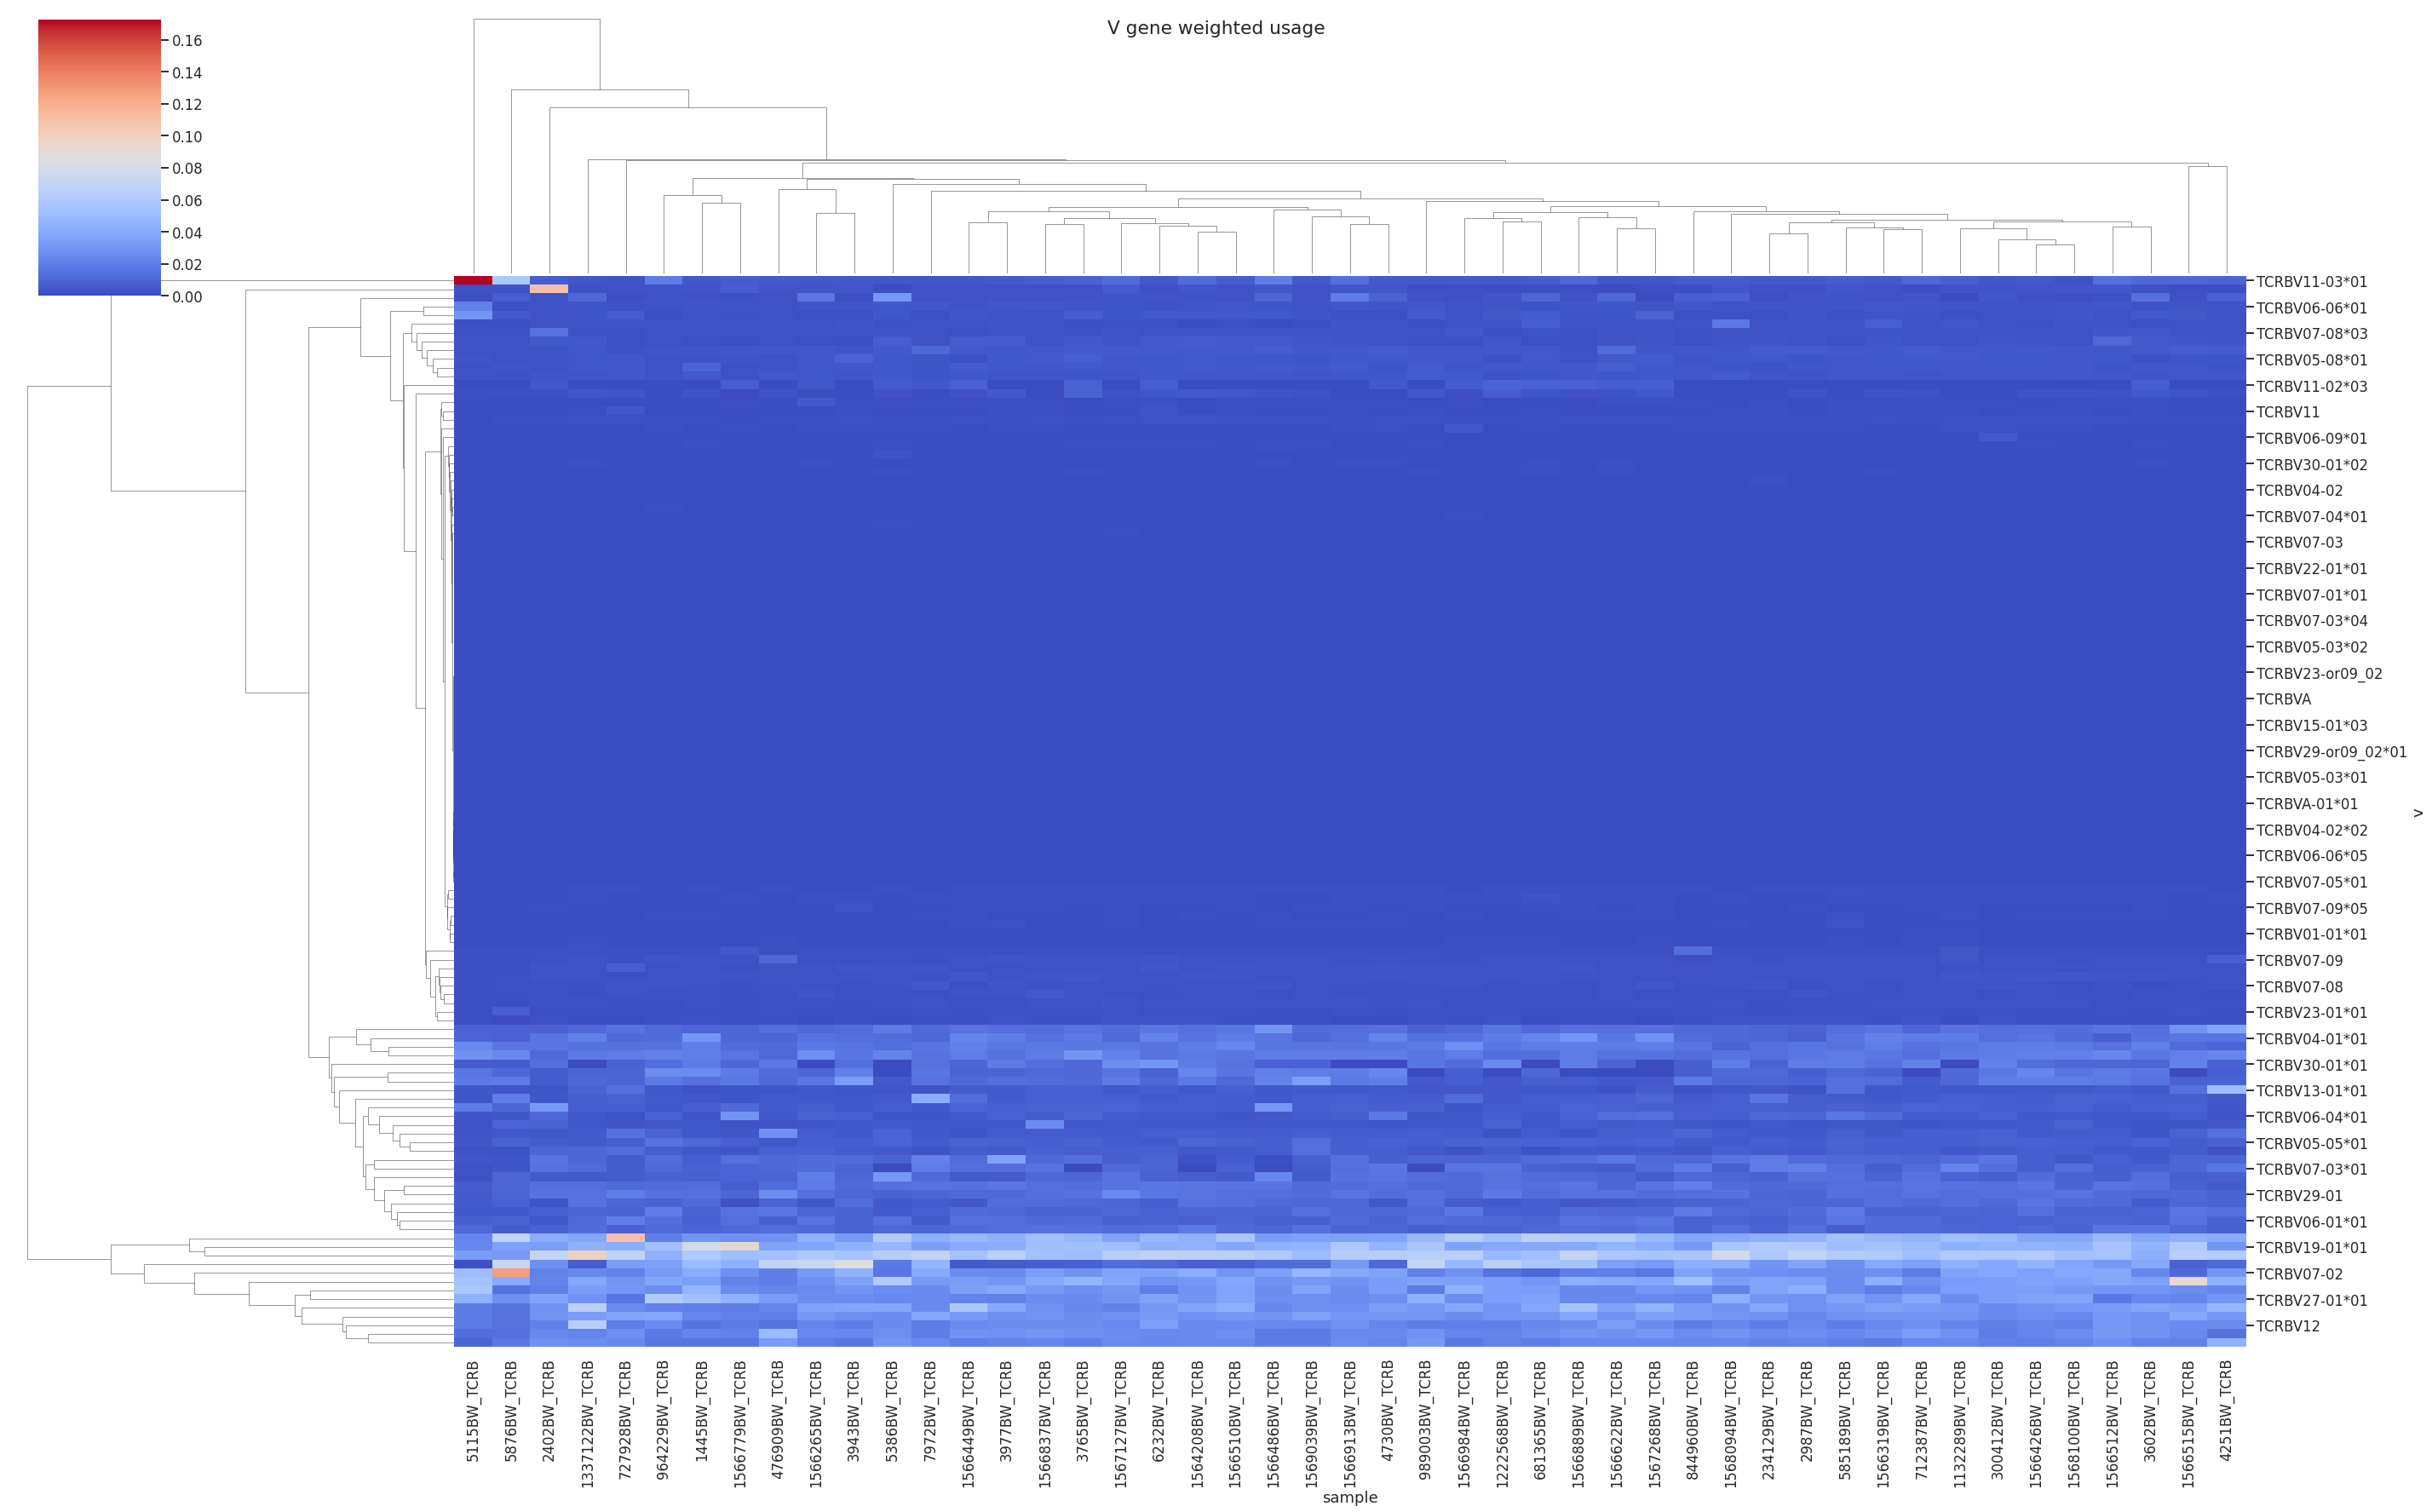

In [ ]:
#reshape the dataframe to wide form dataframe
heatmap_data = pd.pivot_table(df_frequency, values='frequency', index=['v'], columns='sample')

#fill the missing value in frequency with 0
clustermap_data = heatmap_data.fillna(0)

#plot the hierarchically-clustered heatmap
ax = sns.clustermap(clustermap_data, figsize=(40,25),cmap="coolwarm")
ax.fig.suptitle('V gene weighted usage') 

Usage analysis 6.1 - V gene unweighted frequency result table (D gene, J gene)
1.  change 'v' to other genes that you are interested in

In [106]:
#Select the v and sample columns
df_unweighted_frequency = df[['v','sample','hospitalization']]

#Count the v gene 
df_unweighted_frequency = df_unweighted_frequency.groupby(['sample','v','hospitalization'], as_index=False)['v'].agg({'count':'count'})

#Sum the total v gene counts in each sample
df_sum_count=df_unweighted_frequency.groupby(['sample','hospitalization'], as_index=False)['count'].agg({'sum_count':'sum'})

#Add the sum counts of v gene to the dataframe which contains each v gene count
df_unweighted_frequency=pd.merge(df_unweighted_frequency, df_sum_count, on=['sample','hospitalization'])

#Calculate the v gene unweighted frequency
df_unweighted_frequency['unweighted_frequency']=(df_unweighted_frequency['count']/df_unweighted_frequency['sum_count'])

df_unweighted_frequency = df_unweighted_frequency[['sample', 'v', 'unweighted_frequency','hospitalization']]
df_unweighted_frequency

,sample,v,unweighted_frequency,hospitalization
0,1132289BW_TCRB,TCRBV01-01*01,0.000643,False
1,1132289BW_TCRB,TCRBV02-01,0.034902,False
2,1132289BW_TCRB,TCRBV03-01,0.037684,False
3,1132289BW_TCRB,TCRBV04,0.000079,False
4,1132289BW_TCRB,TCRBV04-01*01,0.018613,False
...,...,...,...,...
4628,989003BW_TCRB,TCRBV30-01,0.003508,True
4629,989003BW_TCRB,TCRBV30-01*01,0.022695,True
4630,989003BW_TCRB,TCRBV30-01*05,0.002396,True
4631,989003BW_TCRB,TCRBVA-01*01,0.000030,True


Usage analysis 6.1.1 - Test if the dataset is normally distributed
1.   the null hypothesis here is normality
2.   if the p value is greater than 0.05, we cannot reject the null hypothesis (it is a normal distribution). If the p value is smaller than 0.05, we reject the null hypothesis (it is not a normal distribution)

In [107]:
x = stats.normaltest(df_unweighted_frequency['unweighted_frequency'])
x

NormaltestResult(statistic=2139.640904084751, pvalue=0.0)

Usage analysis 6.1.2 - Stat test
1.   if the dataset is normally distributed, use t-test (stats.ttest_ind)
*   change the group1, group2 to the groups/samples that you are interested in
*   change 'v' to other genes that you are interested in
2.   if the dataset is not normally distributed, use Wilcoxon rank-sum test (stats.ranksums)
*   change the group1, group2 to the groups/samples that you are interested in
*   change 'v' to other genes that you are interested in

In [108]:
def unweighted_usage_stat(df):
    out = {}
    uniq_vsegs = df['v'].unique()
    for V in uniq_vsegs:
        tmp = df[df['v'] == V]
        df_group1 = tmp[tmp['hospitalization'] == True]['unweighted_frequency']
        df_group2 = tmp[tmp['hospitalization'] == False]['unweighted_frequency']
        stat = stats.ranksums(df_group1, df_group2)
        out[V] = stat
    return out

In [109]:
#stat calculation
unweighted_usage_stat(df_unweighted_frequency)

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:6475: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:6475: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:6475: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:6475: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:6475: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:6475: RuntimeWarning: invalid value encounter

{'TCRBV01-01*01': RanksumsResult(statistic=0.0, pvalue=1.0),
 'TCRBV02-01': RanksumsResult(statistic=-1.0757057484009542, pvalue=0.28205887576155886),
 'TCRBV03-01': RanksumsResult(statistic=0.6274950199005567, pvalue=0.5303347996135118),
 'TCRBV04': RanksumsResult(statistic=-0.7768985960673559, pvalue=0.4372185996250276),
 'TCRBV04-01*01': RanksumsResult(statistic=-1.0757057484009542, pvalue=0.28205887576155886),
 'TCRBV04-02': RanksumsResult(statistic=-0.47809144373375745, pvalue=0.6325851216960414),
 'TCRBV04-02*01': RanksumsResult(statistic=0.08964214570007951, pvalue=0.9285715917804441),
 'TCRBV04-02*02': RanksumsResult(statistic=0.0, pvalue=1.0),
 'TCRBV04-03*01': RanksumsResult(statistic=-0.34199278402838473, pvalue=0.7323563227234923),
 'TCRBV05': RanksumsResult(statistic=-0.2091650066335189, pvalue=0.8343194288581393),
 'TCRBV05-01*01': RanksumsResult(statistic=0.6274950199005567, pvalue=0.5303347996135118),
 'TCRBV05-02*01': RanksumsResult(statistic=0.0, pvalue=1.0),
 'TCRBV0

Usage analysis 5.1.3 - Show the V gene weighted usage that are statically significant
1.   change the specific v gene to the ones that are statically significant in your analysis
2.   change 'v' to other genes that you are interested in

In [86]:
df_unweighted_frequency_significant = df_unweighted_frequency.loc[(df_unweighted_frequency['v'] == 'TCRBV18-01*01') | (df_unweighted_frequency['v'] == 'TCRBV30-01*01')] 
df_unweighted_frequency_significant = df_unweighted_frequency_significant.groupby(['hospitalization','v']).agg({'unweighted_frequency':'mean'}).reset_index().rename(columns={'frequency':"mean_unweighted_frequency"})
df_unweighted_frequency_significant

,hospitalization,v,unweighted_frequency
0,False,TCRBV18-01*01,0.031463
1,False,TCRBV30-01*01,0.018569
2,True,TCRBV18-01*01,0.035022
3,True,TCRBV30-01*01,0.024681


Usage analysis 6.2 - V gene weighted usage heatmap (D gene, J gene)
1.   change 'v' to other genes that you are interested in

Text(0.5, 1.0, 'V gene unweighted usage')

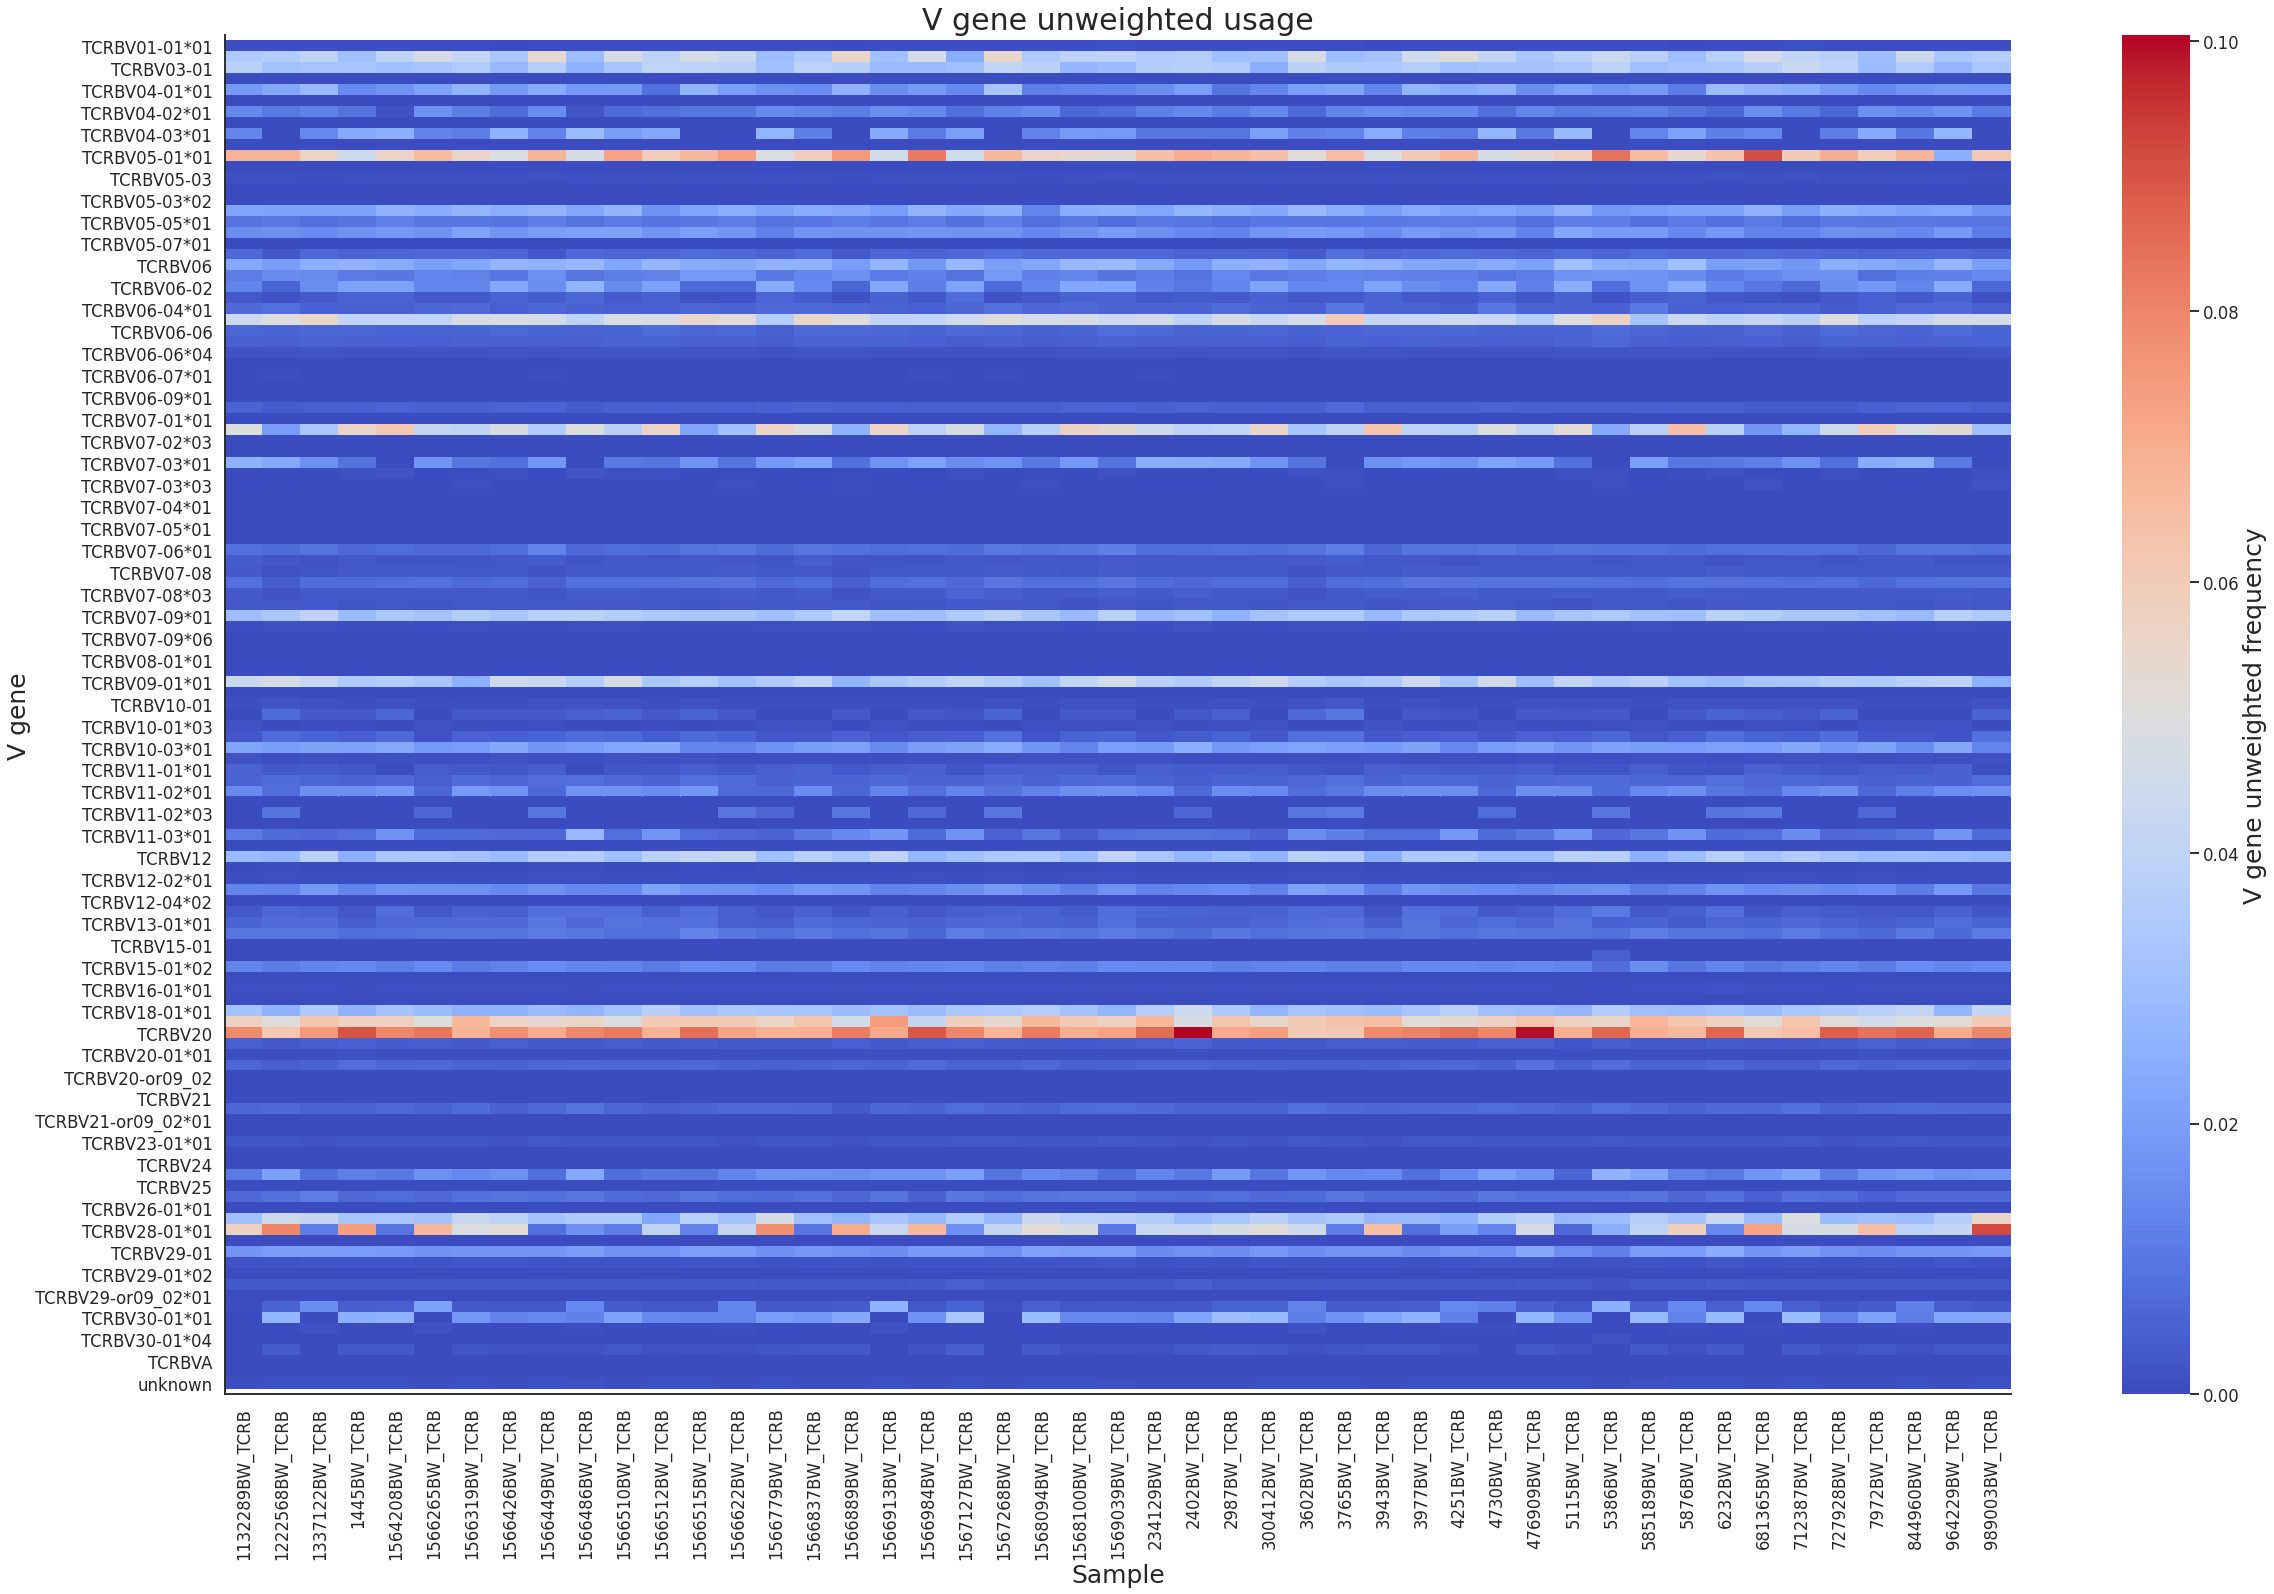

In [111]:
#set aesthetics
plt.style.use(['ggplot', 'seaborn-white'])
plt.figure(figsize=(40,25))
sns.set_style("white")
sns.set_context("talk")

#generate axes
df_unweighted_frequency['unweighted_frequency'] = df_unweighted_frequency['unweighted_frequency'].astype(float)
result = df_unweighted_frequency.pivot(index='v',columns='sample',values='unweighted_frequency')

#fill the missing value in frequency with 0
result = result.fillna(0)

ax = sns.heatmap(result, cmap='coolwarm',cbar_kws={'label': 'V gene unweighted frequency'})
ax.set_xlabel('Sample',fontsize=25)
ax.set_ylabel('V gene',fontsize=25)
cbar_axes = ax.figure.axes[-1]

#change the colorbar label fontsize
ax.figure.axes[-1].yaxis.label.set_size(25)
sns.despine()
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.title('V gene unweighted usage',fontsize=30)

Usage analysis 6.3 - V gene weighted usage hierarchically-clustered heatmap (D gene, J gene)
1.   change 'v' to other genes that you are interested in

Text(0.5, 0.98, 'V gene unweighted usage')

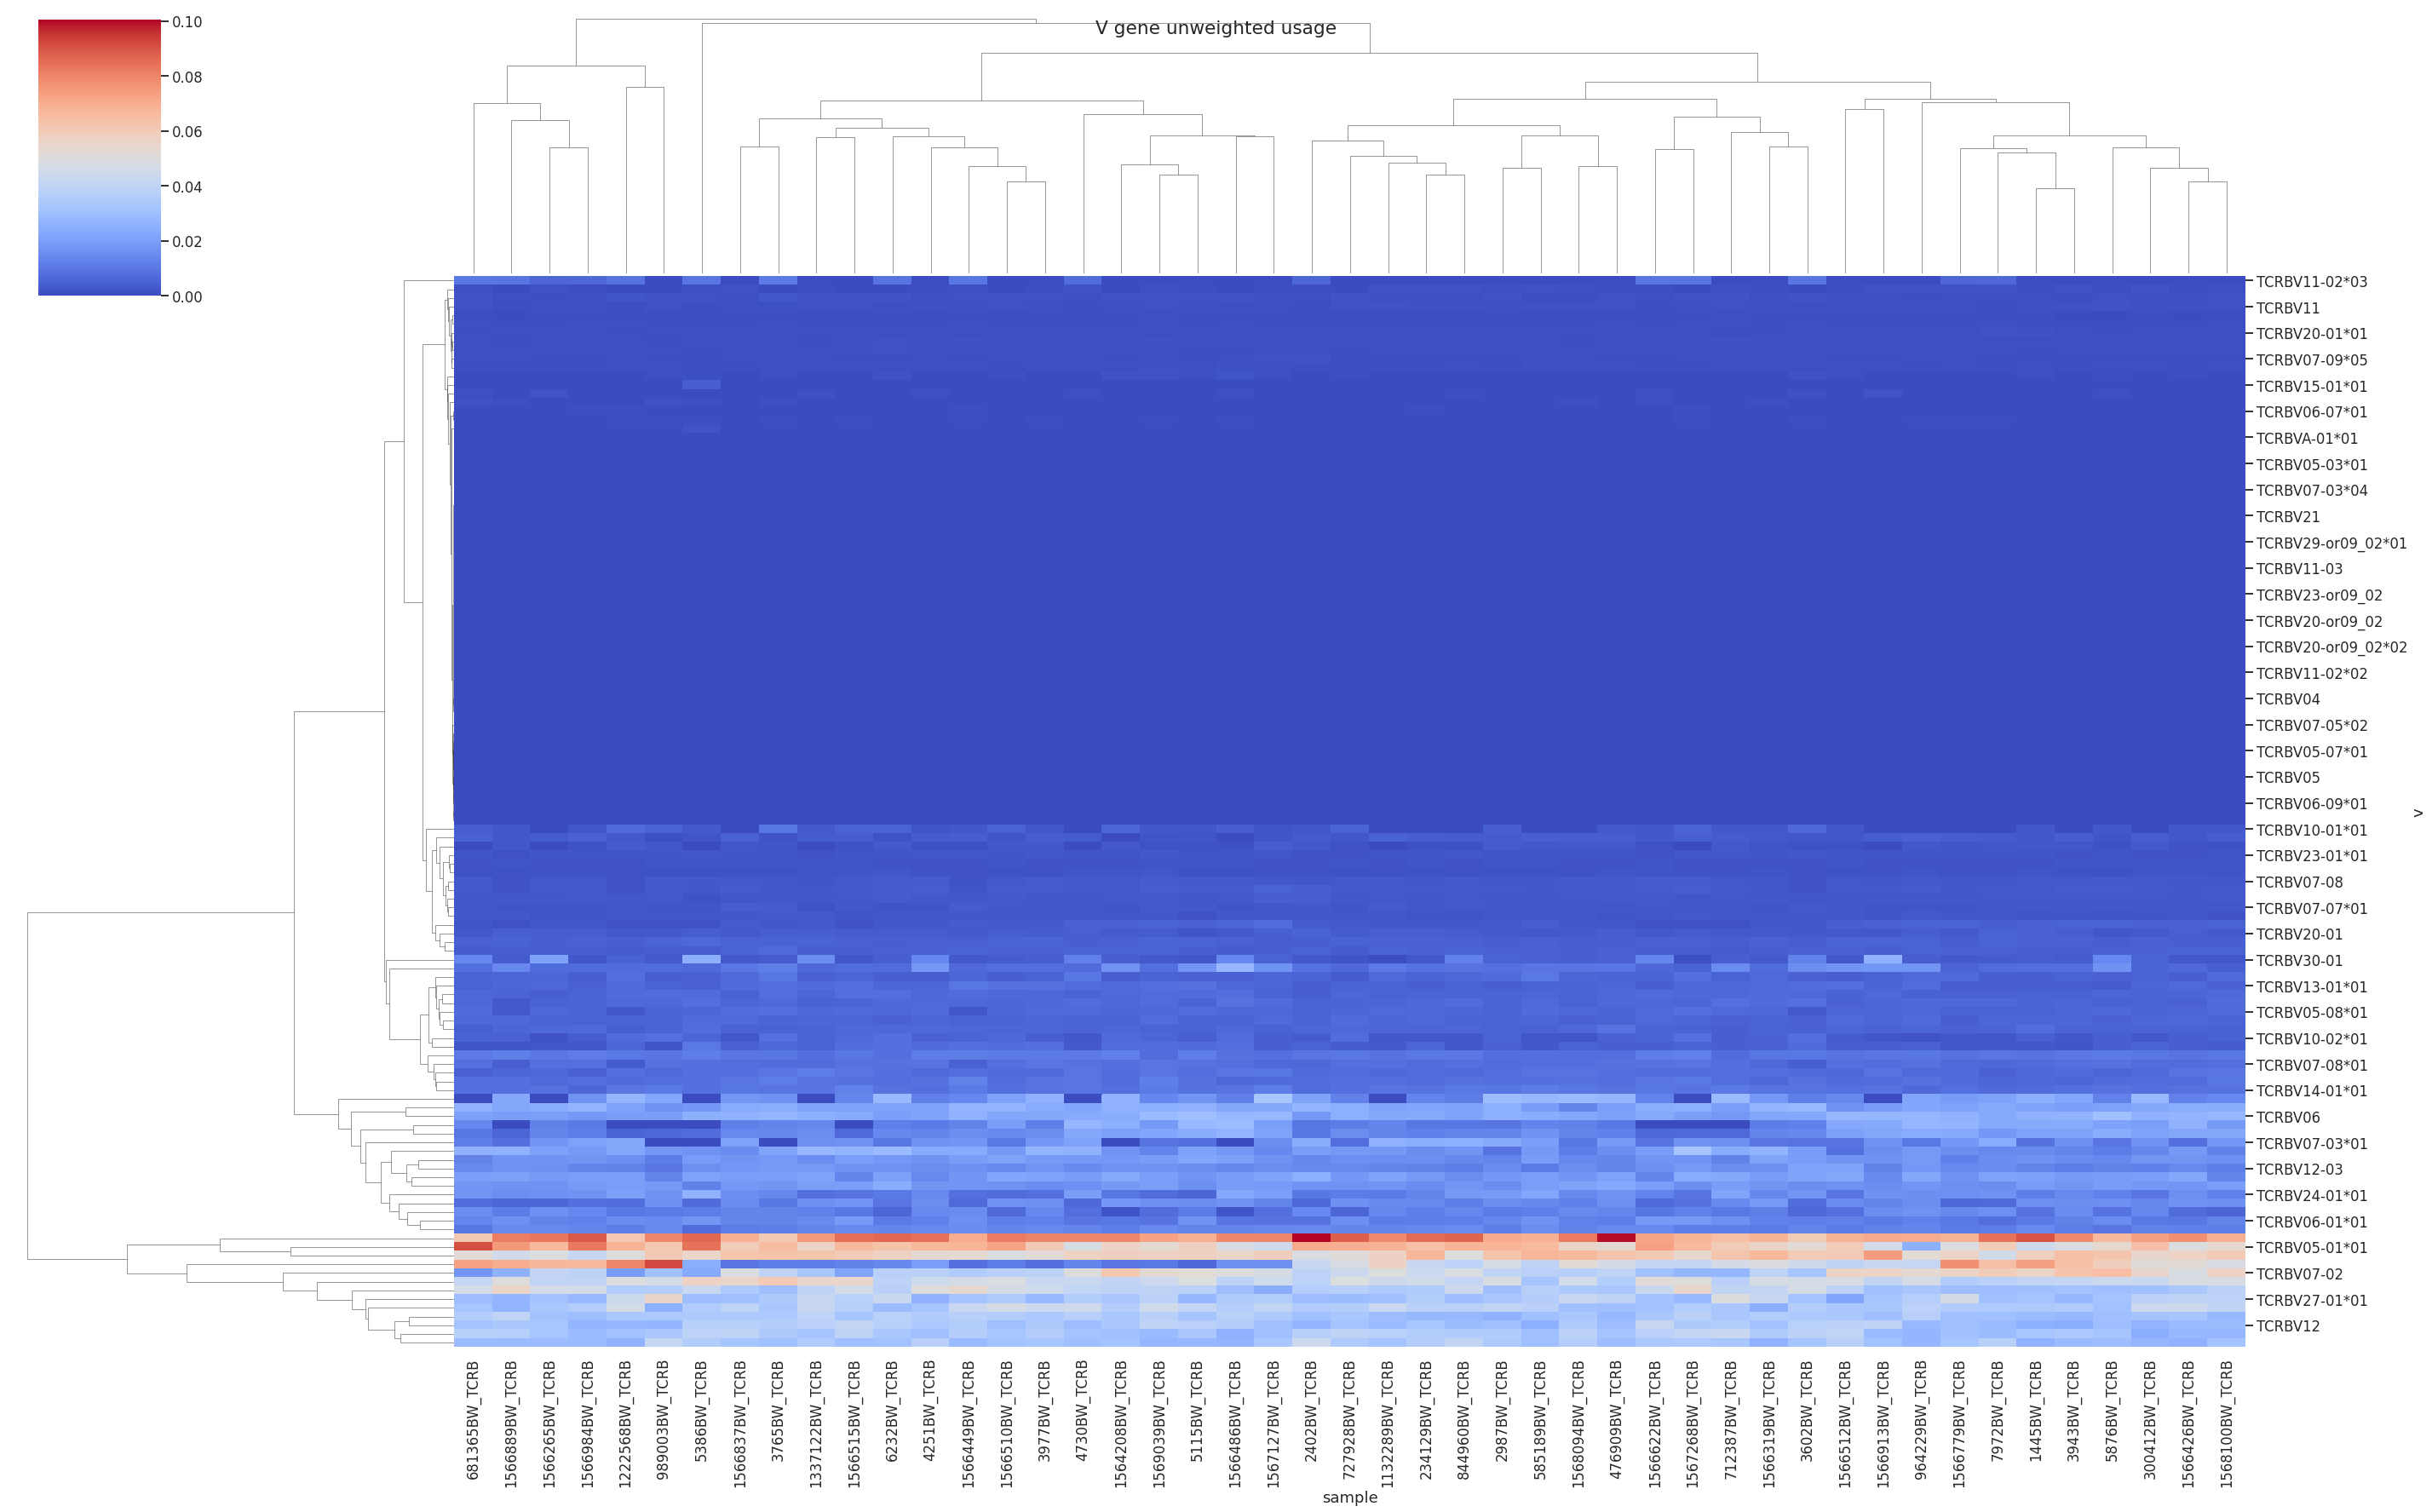

In [112]:
#reshape the dataframe to wide form dataframe
clustermap_data = pd.pivot_table(df_unweighted_frequency, values='unweighted_frequency', index=['v'], columns='sample')

#fill the missing value in frequency with 0
clustermap_data = clustermap_data.fillna(0)

#plot the hierarchically-clustered heatmap
ax = sns.clustermap(clustermap_data, figsize=(40,25),cmap="coolwarm")
ax.fig.suptitle('V gene unweighted usage') 